In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score,davies_bouldin_score
from sklearn.cluster import KMeans,AgglomerativeClustering
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [15]:
#Data loading + checking if there is null values
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
print(df.isnull().sum())
df.head()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [36]:
#Spliting that data into variables and target
X,Y = data.data,data.target
#Applying Standard scaler -> (x-x_mean)/x_std
Scaler = StandardScaler()
x_std = Scaler.fit_transform(X)
#PCA taking the first 2 components
pca = PCA(n_components=3)
x_pca = pca.fit_transform(x_std)

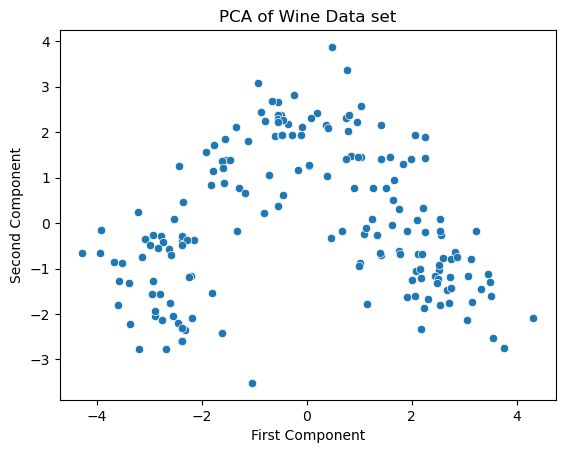

In [44]:
#Seaborn plotting 
sns.scatterplot(x = x_pca[:,0], y= x_pca[:,1])
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('PCA of Wine Data set')
plt.show()

In [39]:
#function that evaluate the model based on Silhouette & Davies-Bouldin Index Scores
def evaluate_clustering(X, labels, name=""):
    silhouette = silhouette_score(X, labels)
    db_index = davies_bouldin_score(X, labels)
    print(f"{name} - Silhouette Score: {silhouette:.3f}, Davies-Bouldin Index: {db_index:.3f}")
    
KMS = KMeans(n_clusters=3, random_state=42)
HeirClust = AgglomerativeClustering(n_clusters=3)

KMS_ANS = KMS.fit_predict(x_std)
evaluate_clustering(x_std,KMS_ANS,'K Means ')
Heir_ANS = HeirClust.fit_predict(x_std)
evaluate_clustering(x_std,Heir_ANS,'Hierarchical ')


C:\Users\Ostor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ostor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K Means  - Silhouette Score: 0.285, Davies-Bouldin Index: 1.389
Hierarchical  - Silhouette Score: 0.277, Davies-Bouldin Index: 1.419


In [40]:
#Applying Methods on PCA 
KMS_ANS = KMS.fit_predict(x_pca)
evaluate_clustering(x_pca,KMS_ANS,'K Means PCA')
Heir_ANS = HeirClust.fit_predict(x_pca)
evaluate_clustering(x_pca,Heir_ANS,'Hierarchical PCA')

C:\Users\Ostor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ostor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K Means PCA - Silhouette Score: 0.454, Davies-Bouldin Index: 0.839
Hierarchical PCA - Silhouette Score: 0.446, Davies-Bouldin Index: 0.852


In [29]:
print("From the scores it appears that : \nPCA got higher Silhouette Score which is better and lower DB Index which is alse Better")

From the scores it appears that : 
PCA got higher Silhouette Score which is better and lower DB Index which is alse Better


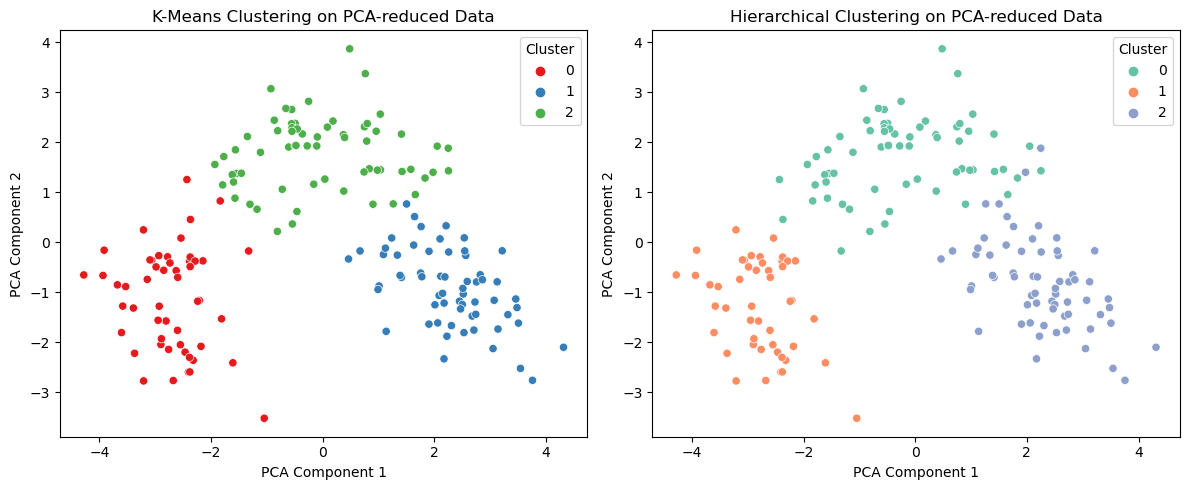

In [45]:
plt.figure(figsize=(12, 5))

# K-Means Clustering
plt.subplot(1, 2, 1)
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=KMS_ANS, palette='Set1')
plt.title("K-Means Clustering on PCA-reduced Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster', loc='best')

# Hierarchical Clustering
plt.subplot(1, 2, 2)
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=Heir_ANS, palette='Set2')
plt.title("Hierarchical Clustering on PCA-reduced Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster', loc='best')

plt.tight_layout()
plt.show()